<a href="https://colab.research.google.com/github/mauricioaalmeida/ONE-ETL/blob/main/Desafios_Estatistica_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sobre o notebook**

Aproveite esse espaço para as atividades do curso de **Estatística com Python: resumindo e analisando dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Utilizando os conhecimentos adquiridos ao longo do curso, você precisará realizar uma **análise descritiva** básica de um conjunto de dados retirados da **Pesquisa Nacional por Amostra de Domicílios - 2015** do IBGE.

Nele, você irá avaliar os tipos dos dados e suas distribuições, calcular as medidas de tendência central, medidas separatrizes e de dispersão dos dados e construirá visuais como histogramas, boxplot, entre outras para responder às perguntas.

Este notebook foi construído com espaços para adicionar as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.





## **Dataset do Projeto**

O conjunto de dados que será explorado aqui é uma adaptação dos dados da **Pesquisa Nacional por Amostra de Domicílios - PNAD**. Ela investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas.

O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### **Fonte dos Dados**

https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?edicao=9128

### **Variáveis do dataset**

> ### UF
> ***

Unidade federativa da pessoa responsável

> ### Sexo
> ***

Sexo biológico da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Idade
> ***

Idade da pessoa responsável na data de referência em anos.

> ### Cor
> ***

Cor ou raça da pessoa responsável com base na autodeclaração

<br>

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|

> ### Anos de Estudo
> ***

Anos de estudo da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|

> ### Renda
> ***

Rendimento mensal do trabalho principal da pessoa responsável para 10 anos ou mais de idade.

> ### Altura (elaboração própria - dado sintético)
> ***

Altura da pessoa responsável em metros.

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

## **Aula 01 - Entendendo os dados**

### **Mão na Massa - Explorando novos dados**




Você está treinando para ser uma pessoa cientista de dados e recebeu a demanda de investigar os dados da PNAD de 2015. A fim de testar as suas habilidades de análise de dados e os conceitos da estatística descritiva, responda às perguntas ao longo do notebook compartilhado.

#### **Importando os pacotes e configurando o ambiente**

In [1]:
# Importando os pacotes do projeto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **Importe o dataset e armazene o conteúdo em um DataFrame**

**Dica:** Passe a url para a função que lê um arquivo do tipo `.csv`

In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/dados_desafio.csv"
dados = pd.read_csv(url)

#### **Visualize o conteúdo do DataFrame e leia as infos sobre os dados (linhas, colunas, tipos)**

**Dica:** Para observar as infos dos dados, utilize a função `info`

In [3]:
dados.shape

(76840, 7)

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  object 
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos.de.Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.1+ MB


#### **Explore brevemente a variável `UF` e investigue quantos dados possuímos para cada estado**

**Dica:** Para explorar, utilize as funções `unique`, `value_counts`, `reset_index` e `barplot`



In [5]:
dados.UF.unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [6]:
dados.UF.value_counts()

,count
UF,
São Paulo,8544
Minas Gerais,7686
Rio Grande do Sul,6322
Bahia,5717
Rio de Janeiro,5556
Pará,4449
Paraná,4356
Pernambuco,3820
Goiás,3478


In [7]:
Estados = dados.UF.value_counts().reset_index()
Estados.columns = ['UF', 'Quantidade']
Estados

,UF,Quantidade
0,São Paulo,8544
1,Minas Gerais,7686
2,Rio Grande do Sul,6322
3,Bahia,5717
4,Rio de Janeiro,5556
5,Pará,4449
6,Paraná,4356
7,Pernambuco,3820
8,Goiás,3478
9,Ceará,3359


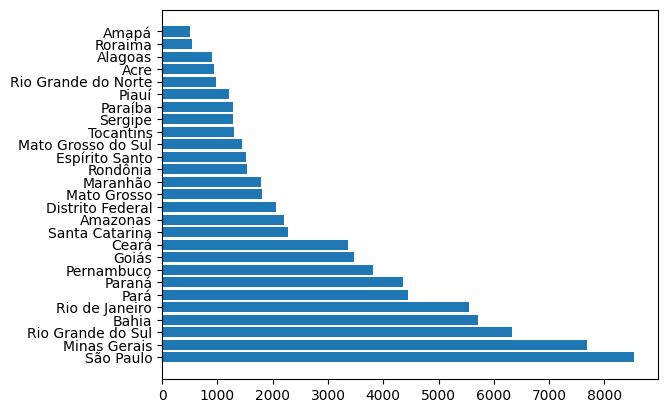

In [8]:
import matplotlib.pyplot as plt
plt.barh(Estados.UF, Estados.Quantidade)
plt.show()

#### **Transforme as variáveis `Sexo`, `Cor` e `Anos.de.Estudo` em Categorical e observe o resultado**

**Dica 1:** Para te auxiliar neste processo, a célula abaixo traz os vetores com os valores de cada coluna na ordem desejada.

**Dica 2:** Utilize a tabela no início do documento para fazer a relação dos valores atuais para os desejados.

In [9]:
# Definindo as variáveis
sexo = {0: 'Masculino', 1: 'Feminino'}

cor = {0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda'}

anos_de_estudo = {1:'Sem instrução e menos de 1 ano', 2:'1 ano', 3:'2 anos', 4:'3 anos', 5:'4 anos', 6:'5 anos',
    7:'6 anos', 8:'7 anos', 9:'8 anos', 10:'9 anos', 11:'10 anos', 12:'11 anos', 13:'12 anos',14:'13 anos',
    15:'14 anos', 16:'15 anos ou mais', 17:'Não determinados'
}

In [10]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
0,Rondônia,0,23,8,12,800,1.60
1,Rondônia,1,23,2,12,1150,1.74
2,Rondônia,1,35,8,15,880,1.76
3,Rondônia,0,46,2,6,3500,1.78
4,Rondônia,1,47,8,9,150,1.69


##### Sexo

In [11]:
dados['Cat.Sexo'] = pd.Categorical(dados.Sexo.map(sexo))


In [12]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo
0,Rondônia,0,23,8,12,800,1.60,Masculino
1,Rondônia,1,23,2,12,1150,1.74,Feminino
2,Rondônia,1,35,8,15,880,1.76,Feminino
3,Rondônia,0,46,2,6,3500,1.78,Masculino
4,Rondônia,1,47,8,9,150,1.69,Feminino


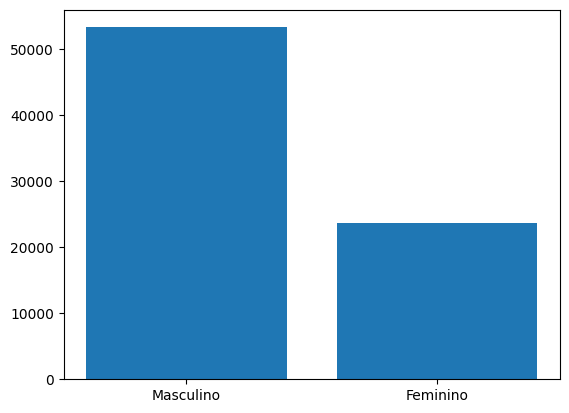

In [13]:
plt.bar(dados['Cat.Sexo'].value_counts().index, dados.Sexo.value_counts())
plt.show()

##### Cor

In [14]:
dados['Cat.Cor'] = pd.Categorical(dados.Cor.map(cor))

In [15]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda


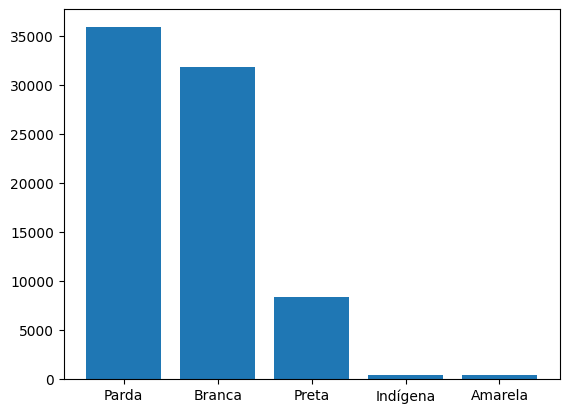

In [16]:
plt.bar(dados['Cat.Cor'].value_counts().index, dados.Cor.value_counts())
plt.show()

##### Anos de Estudo

In [17]:
dados['Cat.Anos.de.Estudo'] = pd.Categorical(dados['Anos.de.Estudo'].map(anos_de_estudo))

In [18]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos


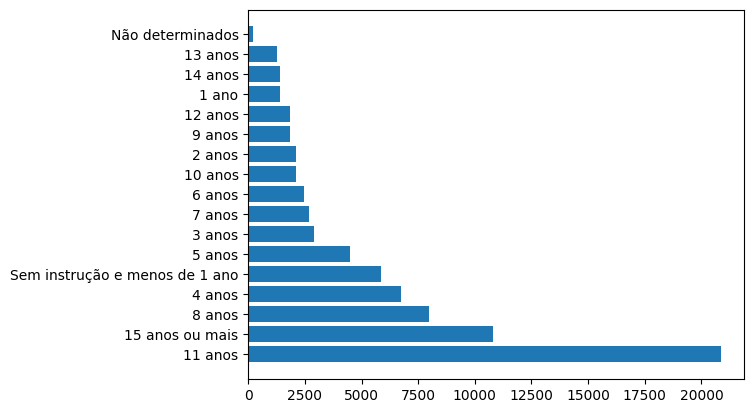

In [19]:
plt.barh(dados['Cat.Anos.de.Estudo'].value_counts().index, dados['Cat.Anos.de.Estudo'].value_counts())
plt.show()

#### **Apresente em texto a menor e maior `Renda` da base de dados**

**Dica:** A renda é uma medida discreta. Utilizamos f-strings para formatar a string de forma mais legível e eficiente, substituindo diretamente as variáveis dentro da string

In [20]:
print(f"A Renda está distribuída entre: R${min(dados['Renda']):,.2f} e R${max(dados['Renda']):,.2f}")

A Renda está distribuída entre: R$0.00 e R$200,000.00


## **Aula 02 - Identificando o perfil do público**

### **Mão na Massa - Analisando o perfil das pessoas responsáveis**

Vamos prosseguir no treinamento, agora identificando o perfil das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015. Responda às perguntas abaixo e reflita sobre os achados.

#### **Construa uma tabela de frequências das pessoas responsáveis pelo domicílio por `Cat.Sexo`. Adicione também uma coluna com esse valor em porcentagem.**

In [21]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos


In [22]:
freq_sexo = dados['Cat.Sexo'].value_counts()
freq_sexo

,count
Cat.Sexo,
Masculino,53250
Feminino,23590


In [23]:
freq_sexo = (dados.groupby('Cat.Sexo', observed=False)
                   .size()
                   .reset_index(name='freq_absoluta')
                   .sort_values(by='Cat.Sexo', ascending=False)
                   )
freq_sexo

,Cat.Sexo,freq_absoluta
1,Masculino,53250
0,Feminino,23590


In [24]:
freq_sexo['Porcentagem'] = round(freq_sexo['freq_absoluta'] / freq_sexo['freq_absoluta'].sum() *100,1)
freq_sexo

,Cat.Sexo,freq_absoluta,Porcentagem
1,Masculino,53250,69.3
0,Feminino,23590,30.7


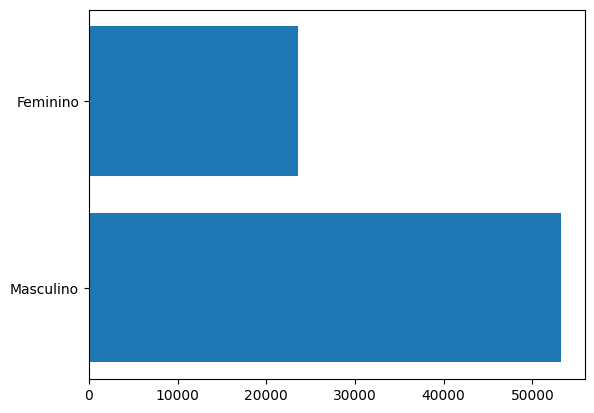

In [25]:
plt.barh(freq_sexo['Cat.Sexo'], freq_sexo['freq_absoluta'])
plt.show()

#### **Construa uma tabela de frequências absolutas e outra de relativas cruzando as variáveis `Cat.Sexo` e `Cat.Cor` das pessoas responsáveis pelo domicílio.**

In [26]:
tab_Sexo_Cor_Absoluta = pd.crosstab(dados['Cat.Sexo'], dados['Cat.Cor'])
tab_Sexo_Cor_Absoluta

Cat.Cor,Amarela,Branca,Indígena,Parda,Preta
Cat.Sexo,,,,,
Feminino,117,9621,101,10862,2889
Masculino,235,22194,256,25063,5502


In [27]:
tab_Sexo_Cor_Relativa_Colunas = pd.crosstab(dados['Cat.Sexo'], dados['Cat.Cor'], normalize = 'columns')*100
tab_Sexo_Cor_Relativa_Colunas

Cat.Cor,Amarela,Branca,Indígena,Parda,Preta
Cat.Sexo,,,,,
Feminino,33.238636,30.240453,28.291317,30.235212,34.429746
Masculino,66.761364,69.759547,71.708683,69.764788,65.570254


In [28]:
tab_Sexo_Cor_Relativa_Total = pd.crosstab(dados['Cat.Sexo'], dados['Cat.Cor'], normalize = 'all')*100
tab_Sexo_Cor_Relativa_Total

Cat.Cor,Amarela,Branca,Indígena,Parda,Preta
Cat.Sexo,,,,,
Feminino,0.152264,12.520822,0.131442,14.135867,3.759761
Masculino,0.305830,28.883394,0.333160,32.617126,7.160333


> #### Conclusões

Os homens são os principais responsáveis em mais de 2/3 das familias, com destaque para os Indígenas que chegam a mais de 71%, e os de Cor Preta que tem o maior percentual de Mulheres responsáveis pelo Domicílio com mais de 34%

Analisando a distribuição total, temos o seguuinte gráfico comparativo:


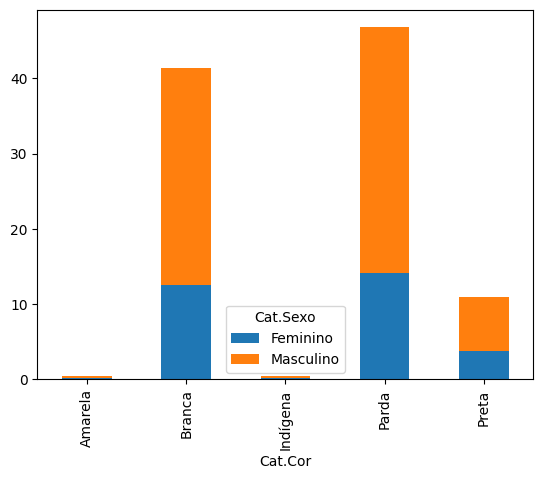

In [29]:
tab_Sexo_Cor_Relativa_Total.T.plot(kind='bar', stacked=True)
plt.show()

Ou seja, os maiores grupos são na ordem:
- Masculino - Parda
- Masculino - Branca
- Feminino - Parda
- Feminino - Branca
- Masculino - Preta
- Feminino - Preta

#### **Construa uma tabela cruzada para calcular a `Renda` média das pessoas responsáveis pelo domicílio em relação ao `Cat.Sexo` e `Cat.Cor`.**

In [30]:
tab_Renda_Sexo_Cor = pd.crosstab(dados['Cat.Sexo'], dados['Cat.Cor'],
                    values=dados['Renda'], aggfunc='mean')*100
tab_Renda_Sexo_Cor = round(tab_Renda_Sexo_Cor,1)
tab_Renda_Sexo_Cor

Cat.Cor,Amarela,Branca,Indígena,Parda,Preta
Cat.Sexo,,,,,
Feminino,302734.2,210986.7,246438.6,117675.9,113459.6
Masculino,475825.1,292574.4,108171.1,165957.7,160386.2


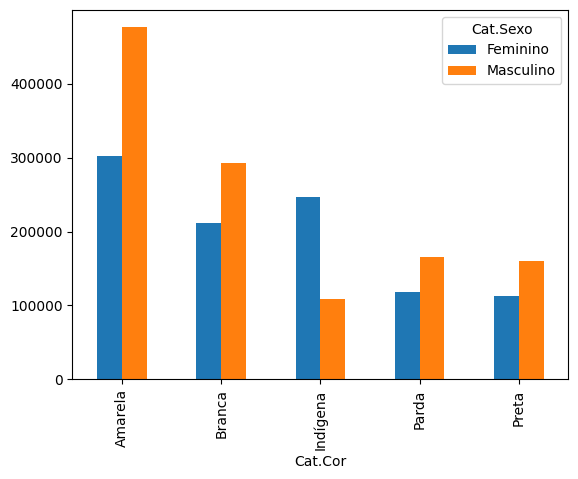

In [31]:
tab_Renda_Sexo_Cor.T.plot(kind='bar', stacked=False)
plt.show()

> #### Conclusões

Os Homens de Cor Amarela tem a maior renda média (apesar de representarem apenas 0,30% do total de responsáveis), seguidos das Mulheres de Cor Amarela, dos Homens de Cor Branca, das Mulheres Indigenas e das Mulheres de Cor Branca.

O Homens identificados com a Cor Indigena tem a menor Renda Média.

## **Aula 03 - Analisando a tendência dos dados**

### **Mão na Massa - Analisando a renda das pessoas responsáveis**

Nesta etapa do treinamento, vamos analisar mais dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, focando na renda e na variável que criamos com as suas alturas. Responda às perguntas abaixo e reflita sobre os achados.

#### **Calcule as medidas de tendência central (média, mediana e moda) para a variável `Renda`**

In [32]:
print(f'Media: {dados.Renda.mean()}')
print(f'Mediana: {dados.Renda.median()}')
print(f'Moda: {dados.Renda.mode()[0]}')

Media: 2000.3831988547631
Mediana: 1200.0
Moda: 788


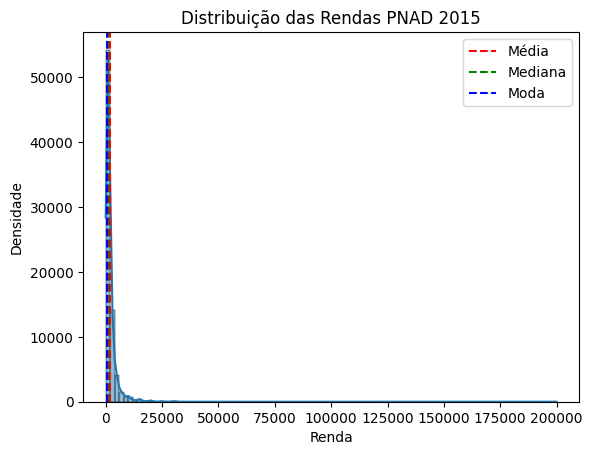

In [33]:
sns.histplot(bins=100, data = dados['Renda'], kde=True, kde_kws={'bw_adjust':2})
plt.title('Distribuição das Rendas PNAD 2015')
plt.axvline(dados['Renda'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(dados['Renda'].median(), color='green', linestyle='--', label='Mediana')
plt.axvline(dados['Renda'].mode()[0], color='blue', linestyle='--', label='Moda')
plt.legend()
plt.xlabel('Renda')
plt.ylabel('Densidade')
plt.show()

#### **Crie um gráfico de barras do Top 5 estados pela médias de `Renda`**

**Dica:** Para conseguir apresentar apenas os Top 5 estados utilize a função `head()` passando como variável quantos valores deseja apresentar.

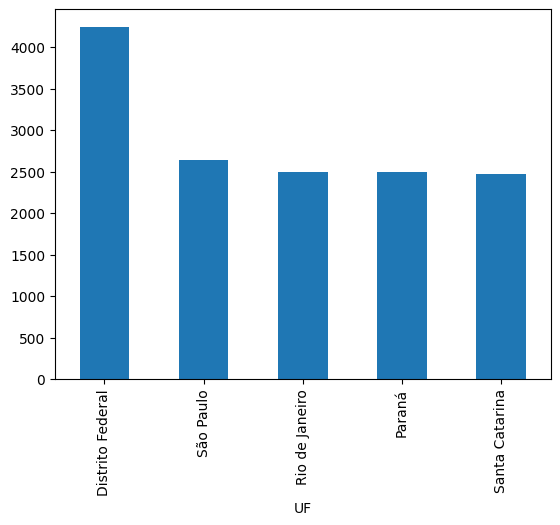

In [34]:
dados.groupby('UF')['Renda'].mean().sort_values(ascending=False).head(5).plot(kind='bar')
plt.show()

> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa 3 tabelas cruzadas calculando a média, mediana e valores máximos de `Renda` relacionando as pessoas responsáveis por estado da Região Sudeste (`UF`) e por `Cat.Sexo`**

In [35]:
dados_sudeste = dados[dados.UF.isin(['São Paulo', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro'])]
dados_sudeste.UF.value_counts()

,count
UF,
São Paulo,8544
Minas Gerais,7686
Rio de Janeiro,5556
Espírito Santo,1511


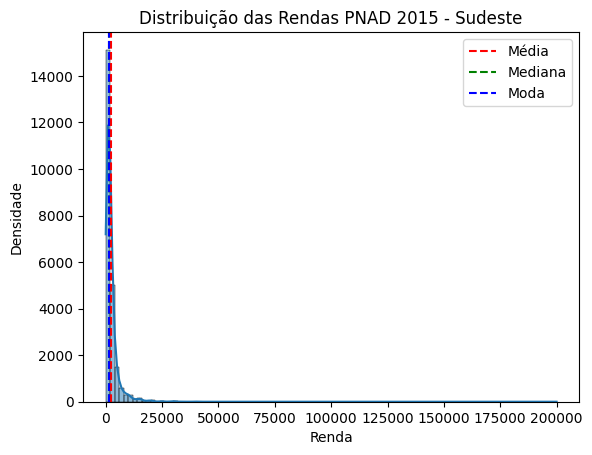

In [36]:
sns.histplot(bins=100, data = dados_sudeste['Renda'], kde=True, kde_kws={'bw_adjust':2})
plt.title('Distribuição das Rendas PNAD 2015 - Sudeste')
plt.axvline(dados_sudeste['Renda'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(dados_sudeste['Renda'].median(), color='green', linestyle='--', label='Mediana')
plt.axvline(dados_sudeste['Renda'].mode()[0], color='blue', linestyle='--', label='Moda')
plt.legend()
plt.xlabel('Renda')
plt.ylabel('Densidade')
plt.show()

##### **Média**

In [37]:
tab_renda_sudeste = pd.crosstab(dados_sudeste.UF, dados_sudeste['Cat.Sexo'],
                    values=dados_sudeste['Renda'], aggfunc=['mean'])
tab_renda_sudeste

mean             
Cat.Sexo           Feminino    Masculino
UF                                      
Espírito Santo  1752.707022  2129.324226
Minas Gerais    1489.616576  2283.158288
Rio de Janeiro  1971.532508  2777.552792
São Paulo       1950.176471  2947.742872

##### **Mediana**

In [38]:
tab_renda_sudeste = pd.crosstab(dados_sudeste.UF, dados_sudeste['Cat.Sexo'],
                    values=dados_sudeste['Renda'], aggfunc=['median'])
tab_renda_sudeste

median          
Cat.Sexo       Feminino Masculino
UF                               
Espírito Santo    927.0    1500.0
Minas Gerais      900.0    1400.0
Rio de Janeiro   1040.5    1510.0
São Paulo        1200.0    1820.0

##### **Renda Máxima**

In [39]:
tab_renda_sudeste = pd.crosstab(dados_sudeste.UF, dados_sudeste['Cat.Sexo'],
                    values=dados_sudeste['Renda'], aggfunc=['max'])
tab_renda_sudeste

max          
Cat.Sexo       Feminino Masculino
UF                               
Espírito Santo   100000     40000
Minas Gerais      30000    100000
Rio de Janeiro   120000    200000
São Paulo         50000     80000

<Axes: title={'center': 'Renda'}, xlabel='UF'>

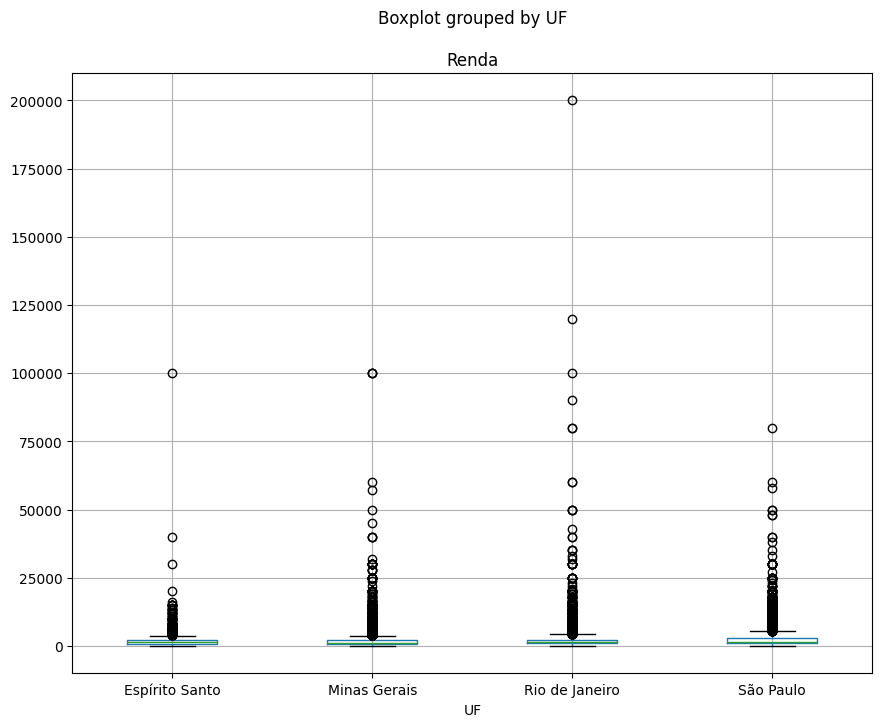

In [40]:
dados_sudeste.boxplot(column='Renda', by='UF', figsize=(10,8))


> #### Conclusões

A distribuição das Rendas na região Sudeste, mostra uma forte Assimetria à direita.
Há valores de Renda muito acima da média em todos os estados, provavelmente Outliers, que distorcem a média, fazendo com que os valores médios fiquem próximos do dobro da mediana

#### **Construa 2 histogramas com curva de densidade com os valores das colunas `Altura` e `Idade` de todas as pessoas responsáveis e compare as curvas obtidas com as suas  MTCs**

##### **Altura**

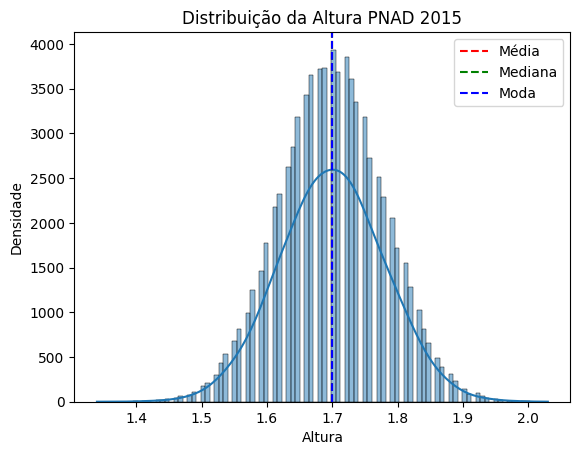

In [41]:
sns.histplot(bins=100, data = dados['Altura'], kde=True, kde_kws={'bw_adjust':2})
plt.title('Distribuição da Altura PNAD 2015')
plt.axvline(dados['Altura'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(dados['Altura'].median(), color='green', linestyle='--', label='Mediana')
plt.axvline(dados['Altura'].mode()[0], color='blue', linestyle='--', label='Moda')
plt.legend()
plt.xlabel('Altura')
plt.ylabel('Densidade')
plt.show()

In [42]:
print(f'Media: {dados.Altura.mean()}')
print(f'Mediana: {dados.Altura.median()}')
print(f'Moda: {dados.Altura.mode()[0]}')

Media: 1.6995084591358667
Mediana: 1.7
Moda: 1.7


> #### Conclusões

A distribuição da Altura mostra grande simetria nos dados, com a média, mediana e moda bem próximas do valor 1,70m

##### **Idade**

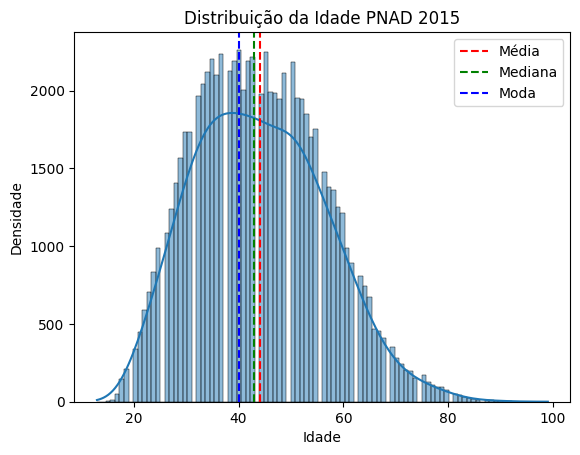

In [43]:
sns.histplot(bins=100, data = dados['Idade'], kde=True, kde_kws={'bw_adjust':2})
plt.title('Distribuição da Idade PNAD 2015')
plt.axvline(dados['Idade'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(dados['Idade'].median(), color='green', linestyle='--', label='Mediana')
plt.axvline(dados['Idade'].mode()[0], color='blue', linestyle='--', label='Moda')
plt.legend()
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.show()

In [44]:
print(f'Media: {dados.Idade.mean()}')
print(f'Mediana: {dados.Idade.median()}')
print(f'Moda: {dados.Idade.mode()[0]}')

Media: 44.07142113482561
Mediana: 43.0
Moda: 40


> #### Conclusões

A distribuição das Idades dos responsáveis mostra uma leve assimetria à direita, com a Média e a Mediana levemente deslocadas, com valores de 44 e 43 anos respectivamente, e a Moda em 40 anos.

## **Aula 04 - Investigando os dados dos colaboradores**

### **Mão na Massa - Analisando as rendas e suas divisões**

Nesta etapa do treinamento, vamos analisar os dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, por meio das medidas separatrizes. Responda às perguntas abaixo e reflita sobre os achados.


#### **Calcule o número de classes para `Renda` até R$15.000 utilizando a regra de Sturges**

$$k = 1 + \frac {10}{3}\log_{10}n$$

onde,

$k$ = número de classes

$n$ = número de observações.


In [45]:
import math

In [46]:
k = 1 + (10/3) * math.log10(len(dados))
k = round(k)
k

17

#### **Crie o histograma da `Renda` das pessoas responsáveis até R$15.000 seguindo o número de classes calculado anteriormente**

> **Observação:** Ao rodar o código para dividir os dados em faixas é possível que você observe o limite inferior da 1ª faixa com um valor negativo. Isto porque a *Regra de Sturges* define o intervalo mínimo da 1ª classe pela seguinte fórmula: $min(Renda) - (max(Renda) - min(Renda)) * 0.001$.



In [47]:
faixas = dados.copy()
faixas = faixas.query('Renda <= 15000')
faixas.describe()

,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
count,76219.000000,76219.000000,76219.000000,76219.000000,76219.000000,76219.000000
mean,0.308020,44.024981,5.047114,9.424199,1809.045579,1.699549
std,0.461678,12.477493,2.856257,4.524573,2016.749586,0.079802
min,0.000000,13.000000,0.000000,1.000000,0.000000,1.340000
25%,0.000000,34.000000,2.000000,6.000000,788.000000,1.650000
50%,0.000000,43.000000,4.000000,10.000000,1200.000000,1.700000
75%,1.000000,53.000000,8.000000,12.000000,2000.000000,1.750000
max,1.000000,99.000000,8.000000,17.000000,15000.000000,2.030000


In [48]:
faixas['faixa_salarial'] = pd.cut(faixas['Renda'], bins=k, include_lowest=True)
faixas

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo,faixa_salarial
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos,"(-15.001, 882.353]"
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos,"(882.353, 1764.706]"
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos,"(-15.001, 882.353]"
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos,"(2647.059, 3529.412]"
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos,"(-15.001, 882.353]"
...,...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,10 anos,"(-15.001, 882.353]"
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,6 anos,"(882.353, 1764.706]"
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,11 anos,"(882.353, 1764.706]"
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,3 anos,"(882.353, 1764.706]"


In [50]:
tabela_frequencias = faixas.groupby('faixa_salarial', observed=False).size().reset_index(name='frequencia')
tabela_frequencias['porcentagem']=round(tabela_frequencias['frequencia']/len(faixas)*100,2)
tabela_frequencias

,faixa_salarial,frequencia,porcentagem
0,"(-15.001, 882.353]",26311,34.52
1,"(882.353, 1764.706]",25816,33.87
2,"(1764.706, 2647.059]",10905,14.31
3,"(2647.059, 3529.412]",4854,6.37
4,"(3529.412, 4411.765]",2133,2.80
5,"(4411.765, 5294.118]",2180,2.86
6,"(5294.118, 6176.471]",1002,1.31
7,"(6176.471, 7058.824]",672,0.88
8,"(7058.824, 7941.176]",208,0.27
9,"(7941.176, 8823.529]",554,0.73


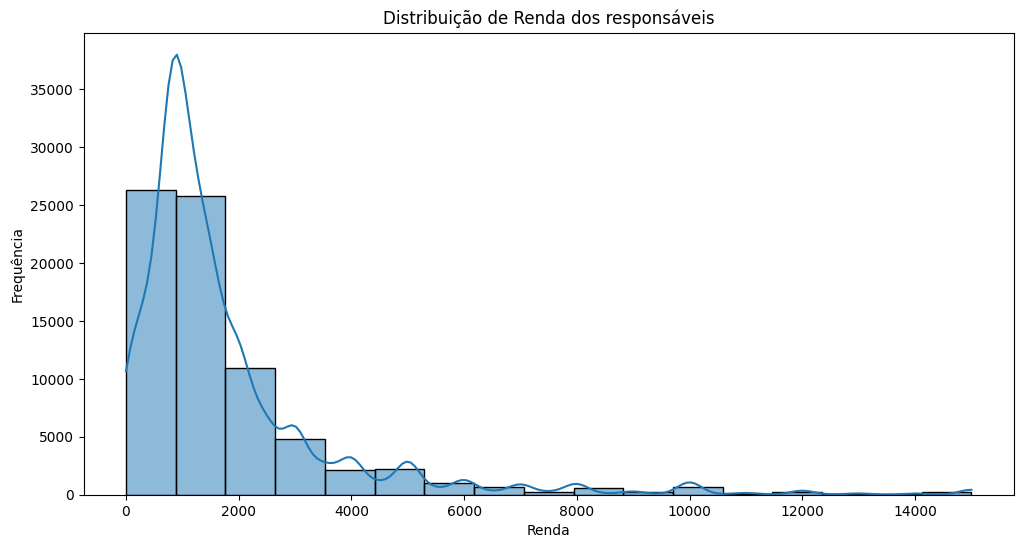

In [51]:
plt.figure(figsize=(12, 6))
sns.histplot(data=faixas, x='Renda', kde=True, bins = k)
plt.title('Distribuição de Renda dos responsáveis')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.show()

In [52]:
faixas.describe()

,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
count,76219.000000,76219.000000,76219.000000,76219.000000,76219.000000,76219.000000
mean,0.308020,44.024981,5.047114,9.424199,1809.045579,1.699549
std,0.461678,12.477493,2.856257,4.524573,2016.749586,0.079802
min,0.000000,13.000000,0.000000,1.000000,0.000000,1.340000
25%,0.000000,34.000000,2.000000,6.000000,788.000000,1.650000
50%,0.000000,43.000000,4.000000,10.000000,1200.000000,1.700000
75%,1.000000,53.000000,8.000000,12.000000,2000.000000,1.750000
max,1.000000,99.000000,8.000000,17.000000,15000.000000,2.030000


> #### Conclusões

Filtrando apenas os dados com Renda menor do que R\$ 15.000, temos 75\% do total de responsáveis com renda até R$2.000,00

#### **Responda as seguintes questões sobre o nosso dataset completo utilizando os conceitos que estudamos até aqui:**

##### **1. Qual o percentual de pessoas responsáveis que ganhava até um salário mínimo em 2015 (R$ 788,00)?**



In [53]:
#Definindo o salário mínimo e classes
sm = 788

# Definindo as classes salariais com base no salário mínimo
classes = [dados['Renda'].min(), sm * 1, sm * 5, sm * 10, sm * 20, dados['Renda'].max()]

classes

[0, 788, 3940, 7880, 15760, 200000]

In [54]:
labels = ['E', 'D', 'C', 'B', 'A']
rendas = dados.copy()
rendas['faixa_salarial'] = pd.cut(dados['Renda'], bins=classes, labels=labels, right=True, include_lowest=True)

rendas

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo,faixa_salarial
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos,D
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos,D
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos,D
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos,D
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos,E
...,...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,10 anos,D
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,6 anos,D
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,11 anos,D
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,3 anos,D


In [55]:
freq = rendas.groupby('faixa_salarial', observed=False).size().reset_index(name='frequencia')
freq['percentual'] = round(freq['frequencia'] / len(faixas) * 100, 2)
freq

,faixa_salarial,frequencia,percentual
0,E,22182,29.10
1,D,46175,60.58
2,C,5697,7.47
3,B,2178,2.86
4,A,608,0.80


In [57]:
resp = freq['percentual'][0]

In [58]:
print(f'Percentual de responsáveis com renda menor do 1 salario mínimo: { resp }%')

Percentual de responsáveis com renda menor do 1 salario mínimo: 29.1%


##### **2. Qual a renda máxima de 95% das pessoas responsáveis na pesquisa?**


In [59]:
renda_max_95 = dados.Renda.quantile(0.95)
print(f'Renda máxima de 95 % dos responsáveis: R${ renda_max_95 }')

Renda máxima de 95 % dos responsáveis: R$6000.0


In [62]:
rendas = rendas.sort_values('Renda').reset_index(drop=True)
rendas['percentual'] = rendas['Renda'] / rendas['Renda'].sum() * 100
rendas['acumulado'] = rendas['percentual'].cumsum()
rendas

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo,faixa_salarial,percentual,acumulado
0,Paraná,0,76,2,1,0,1.73,Masculino,Branca,Sem instrução e menos de 1 ano,E,0.000000,0.000000
1,Sergipe,0,79,4,2,0,1.64,Masculino,Preta,1 ano,E,0.000000,0.000000
2,Sergipe,1,59,8,1,0,1.64,Feminino,Parda,Sem instrução e menos de 1 ano,E,0.000000,0.000000
3,Sergipe,0,65,4,1,0,1.78,Masculino,Preta,Sem instrução e menos de 1 ano,E,0.000000,0.000000
4,Sergipe,0,68,8,1,0,1.72,Masculino,Parda,Sem instrução e menos de 1 ano,E,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76835,Minas Gerais,0,61,2,16,100000,1.58,Masculino,Branca,15 anos ou mais,A,0.065058,99.531584
76836,Rio de Janeiro,1,53,0,13,120000,1.66,Feminino,Indígena,12 anos,A,0.078069,99.609653
76837,Paraná,0,42,2,16,200000,1.58,Masculino,Branca,15 anos ou mais,A,0.130116,99.739769
76838,Bahia,0,51,2,12,200000,1.59,Masculino,Branca,11 anos,A,0.130116,99.869884


##### **3.   Qual a renda mínima dos 1% mais bem pagos da pesquisa?**

In [63]:
renda_min_1 = dados.Renda.quantile(0.99)
print(f'Renda mínima dos 1% mais bem pagos: R${ renda_min_1 }')

Renda mínima dos 1% mais bem pagos: R$15000.0


##### **4. Qual a renda máxima de 25%, 50% e 75% das pessoas responsáveis que receberam até R$ 6.000 de rendimento mensal? Construa o boxplot e traga o resumo desses dados.**


In [64]:
renda_6000 = dados.copy().query('Renda <= 6000')
renda_6000

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos
...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,10 anos
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,6 anos
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,11 anos
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,3 anos


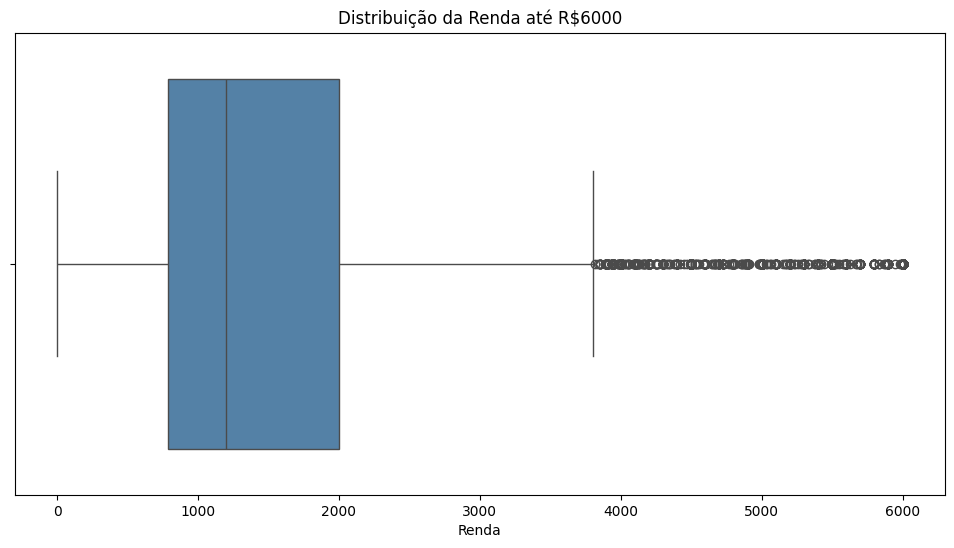

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=renda_6000, x='Renda', color = 'steelblue')
plt.title('Distribuição da Renda até R$6000')
plt.show()

In [66]:
renda_6000.describe()

,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
count,73193.000000,73193.000000,73193.000000,73193.000000,73193.000000,73193.000000
mean,0.311847,43.913995,5.107756,9.209720,1491.327545,1.699560
std,0.463251,12.520130,2.851690,4.456091,1198.146161,0.079807
min,0.000000,13.000000,0.000000,1.000000,0.000000,1.340000
25%,0.000000,34.000000,2.000000,5.000000,788.000000,1.650000
50%,0.000000,43.000000,4.000000,10.000000,1200.000000,1.700000
75%,1.000000,53.000000,8.000000,12.000000,2000.000000,1.750000
max,1.000000,99.000000,8.000000,17.000000,6000.000000,2.030000


> #### Conclusões

A renda máxima das pessoas com até R\$6.000 está distribuida assim:
- 25\% = 788,00 (um salário mínimo da época)
- 50\% = 1200,00
- 75\% = 2000,00


#### **Construa o boxplot da `Renda` até o percentil 95% (`renda_6k`) das pessoas responsáveis por `Cat.Sexo` e `Cat.Cor`. Interprete o resultado.**

**Dica:** Para incluir uma 3ª variável na construção de um boxplot, utilize o parâmetro `hue` da seguinte maneira: `(x = Renda, y = Cat.Cor, hue = Cat.Sexo)`.

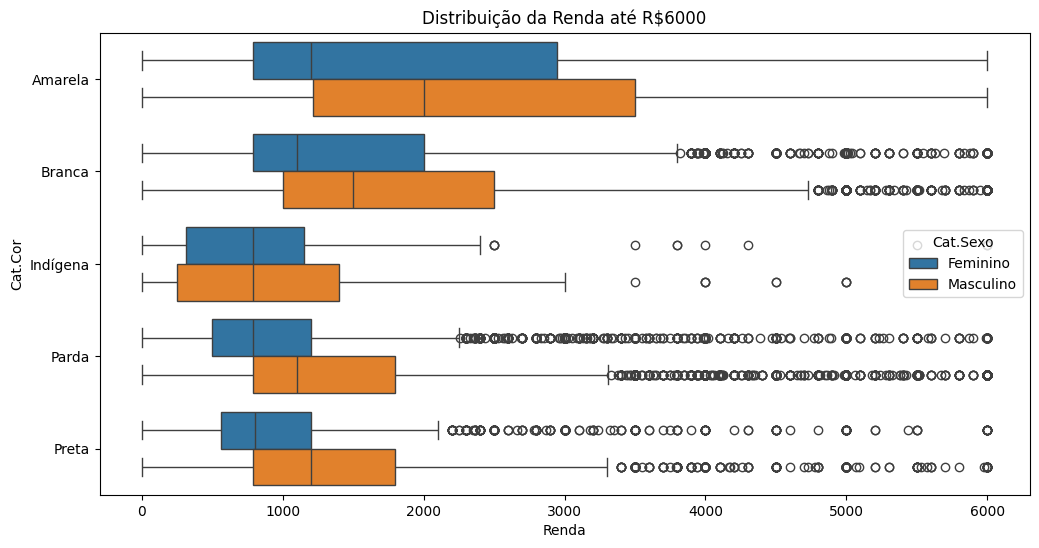

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=renda_6000, x='Renda', y = 'Cat.Cor', hue = 'Cat.Sexo')
plt.title('Distribuição da Renda até R$6000')
plt.show()

#### **Qual a idade limite para 20% da população? Construa o histograma acumulado com curva de densidade, definindo a idade limite e quantas pessoas se encaixam nessa porcentagem.**

**Dica:** Para ler os últimos valores de um DataFrame utilize a função `tail()`.

Exemplo: `df.tail(3)` lê os ultimos 3 registros do DataFrame `df`.

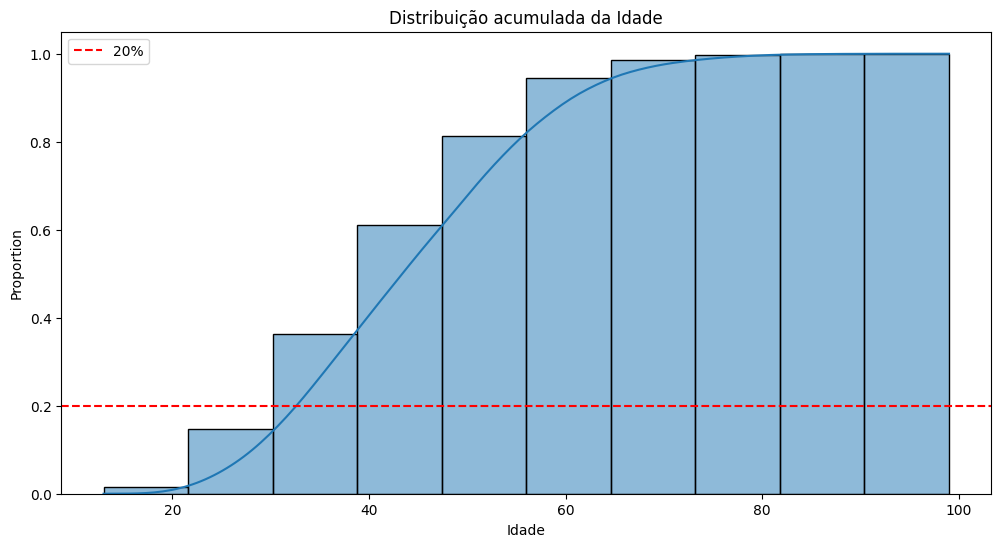

In [71]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dados, x='Idade', bins = 10, cumulative=True, stat='proportion', kde=True)
plt.axhline(0.20, color='red', linestyle='--', label='20%')
plt.legend()
plt.title('Distribuição acumulada da Idade')
plt.xlabel('Idade')
plt.show()

In [69]:
idades_class = dados.copy()
idades_class = idades_class.sort_values(by='Idade').reset_index(drop=True)
idades_class['cumulativo'] = (idades_class['Idade'].index + 1 )/ len(idades_class)
idades_class['qualificado'] = idades_class['cumulativo'].apply(lambda x: True if x <= 0.2 else False)
idades_class


,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo,cumulativo,qualificado
0,Amazonas,0,13,8,6,100,1.61,Masculino,Parda,5 anos,0.000013,True
1,Espírito Santo,0,14,8,4,300,1.65,Masculino,Parda,3 anos,0.000026,True
2,Maranhão,1,15,4,9,200,1.53,Feminino,Preta,8 anos,0.000039,True
3,Rondônia,0,15,4,6,400,1.64,Masculino,Preta,5 anos,0.000052,True
4,Minas Gerais,1,15,8,3,0,1.81,Feminino,Parda,2 anos,0.000065,True
...,...,...,...,...,...,...,...,...,...,...,...,...
76835,Tocantins,0,92,8,1,0,1.68,Masculino,Parda,Sem instrução e menos de 1 ano,0.999948,False
76836,Minas Gerais,0,94,2,4,0,1.80,Masculino,Branca,3 anos,0.999961,False
76837,Acre,0,95,8,9,500,1.86,Masculino,Parda,8 anos,0.999974,False
76838,Maranhão,0,97,0,1,0,1.76,Masculino,Indígena,Sem instrução e menos de 1 ano,0.999987,False


In [70]:
idades_qualificados = idades_class[idades_class['qualificado'] == True]
idade_20 = idades_qualificados.tail(1)['Idade'].reset_index(drop=True)[0]
print(f'A idade limite para 20% da população é: {idade_20} anos')


A idade limite para 20% da população é: 33 anos


> #### Conclusões

Escreva suas conclusões aqui...

## **Aula 05 - Analisando a variação dos dados**

### **Mão na Massa - Analisando a variação da Renda das pessoas responsáveis**

Nesta última etapa do treinamento, vamos analisar os dados de renda das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, calculando a variação desta para determinadas características da amostra. Responda às perguntas abaixo e reflita sobre os achados.


#### **Responda as seguintes questões sobre o nosso dataset utilizando os conceitos que estudamos até aqui:**

##### **1.   Qual o desvio médio absoluto, a variância e desvio padrão da renda das pessoas responsáveis na pesquisa?**





In [79]:
estatisticas_renda = dados['Renda'].agg(
    Mediana = 'median',
    Media = 'mean',
    mad=lambda x: np.abs(x - x.mean()).mean(),
    IIQ = lambda x: x.quantile(0.75) - x.quantile(0.25),
    variancia = 'var',
    DesvioPadrao = 'std'
).round(2).astype(str)
estatisticas_renda

,Renda
Mediana,1200.0
Media,2000.38
mad,1526.5
IIQ,1212.0
variancia,11044906.01
DesvioPadrao,3323.39


##### **2. Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas em relação aos Anos de Estudo. O que podemos interpretar com esses dados?**

In [98]:
estatisticas_renda_estudo = dados.groupby(['Anos.de.Estudo','Cat.Anos.de.Estudo'], observed=True)['Renda'].agg(
    Mediana = 'median',
    Media = 'mean',
    #mad=lambda x: np.abs(x - x.mean()).mean(),
    #IIQ = lambda x: x.quantile(0.75) - x.quantile(0.25),
    #variancia = 'var',
    DesvioPadrao = 'std'
).round(2).astype(str)
estatisticas_renda_estudo

,,Mediana,Media,DesvioPadrao
Anos.de.Estudo,Cat.Anos.de.Estudo,,,
1,Sem instrução e menos de 1 ano,600.0,732.99,955.27
2,1 ano,700.0,806.52,1203.87
3,2 anos,788.0,842.56,1298.87
4,3 anos,788.0,980.04,1907.14
5,4 anos,900.0,1150.44,1293.14
6,5 anos,940.0,1183.58,1328.71
7,6 anos,1000.0,1284.08,1326.14
8,7 anos,1000.0,1289.17,1279.41
9,8 anos,1100.0,1437.74,1404.28


> #### Conclusões

Quanto mais anos de estudo, maior é Renda Média e a variação da Renda dos responsáveis.

##### **3.   Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas do sexo biológico masculino e feminino até R$ 15.000. O que podemos interpretar com esses dados?**

In [102]:
estatisticas_renda_sexo = dados.groupby('Cat.Sexo', observed=True)['Renda'].agg(
    Mediana = 'median',
    Media = 'mean',
    #mad=lambda x: np.abs(x - x.mean()).mean(),
    #IIQ = lambda x: x.quantile(0.75) - x.quantile(0.25),
    #variancia = 'var',
    DesvioPadrao = 'std'
).round(2).astype(str)
estatisticas_renda_sexo

,Mediana,Media,DesvioPadrao
Cat.Sexo,,,
Feminino,900.0,1566.85,2570.66
Masculino,1350.0,2192.44,3590.31


In [103]:
estatisticas_renda_sexo = dados.query('Renda <=15000').groupby('Cat.Sexo', observed=True)['Renda'].agg(
    Mediana = 'median',
    Media = 'mean',
    #mad=lambda x: np.abs(x - x.mean()).mean(),
    #IIQ = lambda x: x.quantile(0.75) - x.quantile(0.25),
    #variancia = 'var',
    DesvioPadrao = 'std'
).round(2).astype(str)
estatisticas_renda_sexo

,Mediana,Media,DesvioPadrao
Cat.Sexo,,,
Feminino,900.0,1460.14,1763.69
Masculino,1300.0,1964.35,2101.16


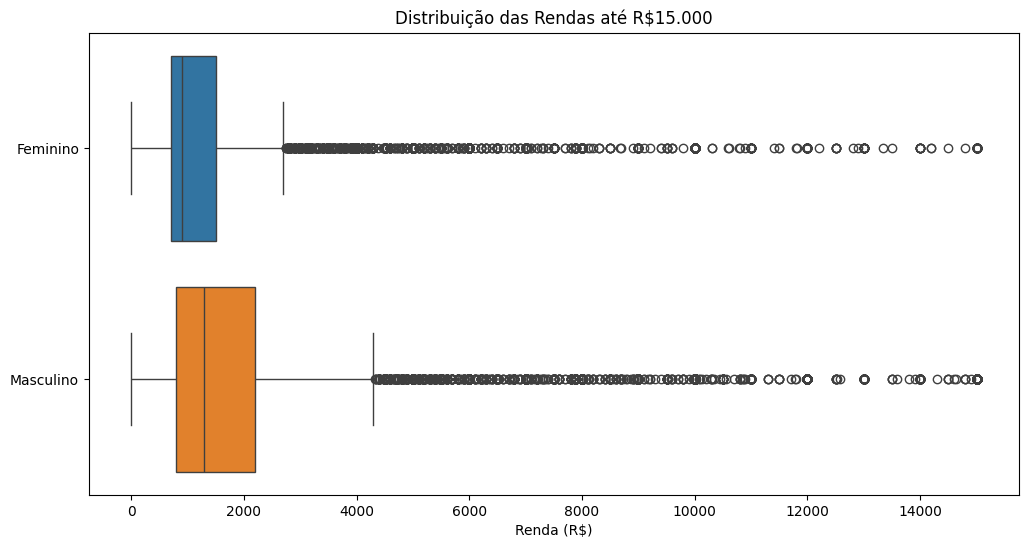

In [121]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dados.query('Renda <=15000'), x='Renda', y='Cat.Sexo', hue='Cat.Sexo')
plt.title('Distribuição das Rendas até R$15.000')

plt.xlabel('Renda (R$)')
plt.ylabel('')
plt.show()


> #### Conclusões

A Renda Média, a Mediana e o Desvio Padrão do sexo feminino são consideravelmente menores se comparados ao sexo masculino.

#### **Construa um boxplot da `Renda` dos estados da Região Centro-Oeste até R$ 10.000 segundo o `Cat.Sexo`. Para interpretar o resultado construa 3 tabelas com cada uma das estatísticas descritivas (média, mediana e desvio padrão).**

In [104]:
centro_oeste = dados.query('(UF == "Mato Grosso" or UF == "Mato Grosso do Sul" or UF == "Distrito Federal" or UF == "Goiás") and (Renda <= 10000)')
centro_oeste.UF.value_counts()

,count
UF,
Goiás,3442
Distrito Federal,1870
Mato Grosso,1779
Mato Grosso do Sul,1411


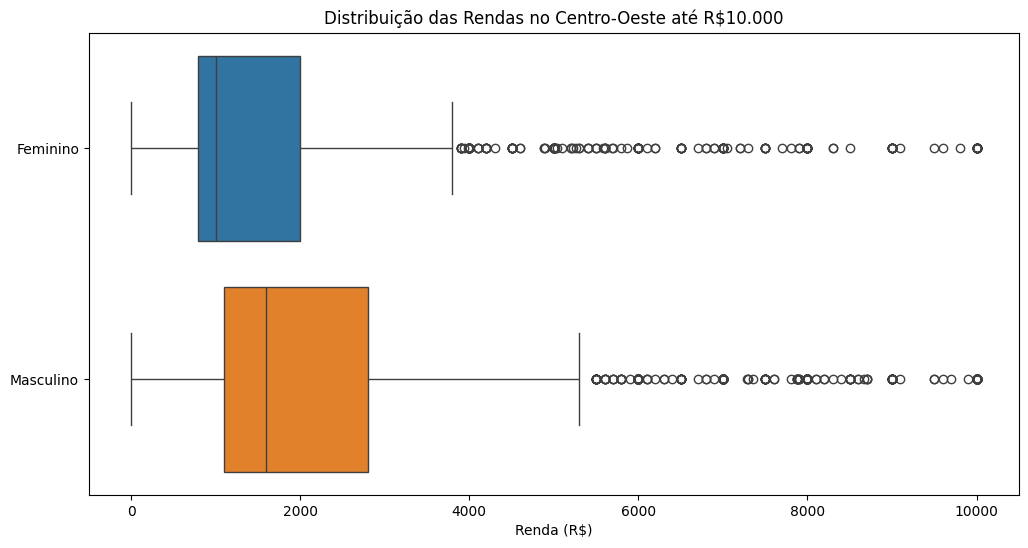

In [119]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=centro_oeste, x='Renda', y='Cat.Sexo', hue='Cat.Sexo')
plt.title('Distribuição das Rendas no Centro-Oeste até R$10.000')

plt.xlabel('Renda (R$)')
plt.ylabel('')
plt.show()

##### **Média**

In [116]:
centro_oeste.groupby('Cat.Sexo').Renda.mean()

/tmp/ipython-input-116-831567948.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  centro_oeste.groupby('Cat.Sexo').Renda.mean()


,Renda
Cat.Sexo,
Feminino,1724.302263
Masculino,2276.930280


##### **Mediana**

In [117]:
centro_oeste.groupby('Cat.Sexo').Renda.median()

/tmp/ipython-input-117-352310109.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  centro_oeste.groupby('Cat.Sexo').Renda.median()


,Renda
Cat.Sexo,
Feminino,1000.0
Masculino,1600.0


##### **Desvio Padrão**

In [118]:
centro_oeste.groupby('Cat.Sexo').Renda.std()

/tmp/ipython-input-118-1387012436.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  centro_oeste.groupby('Cat.Sexo').Renda.std()


,Renda
Cat.Sexo,
Feminino,1799.670770
Masculino,1896.274832


> #### Conclusões


A Renda Média, a Mediana e o Desvio Padrão do sexo feminino são consideravelmente menores se comparados ao sexo masculino.